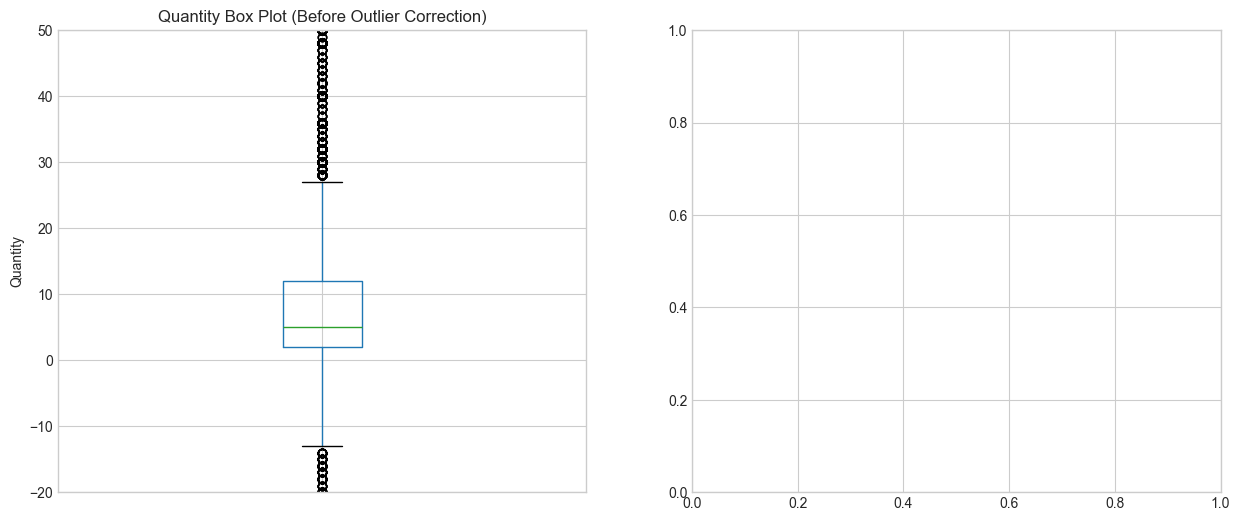

<Figure size 640x480 with 0 Axes>

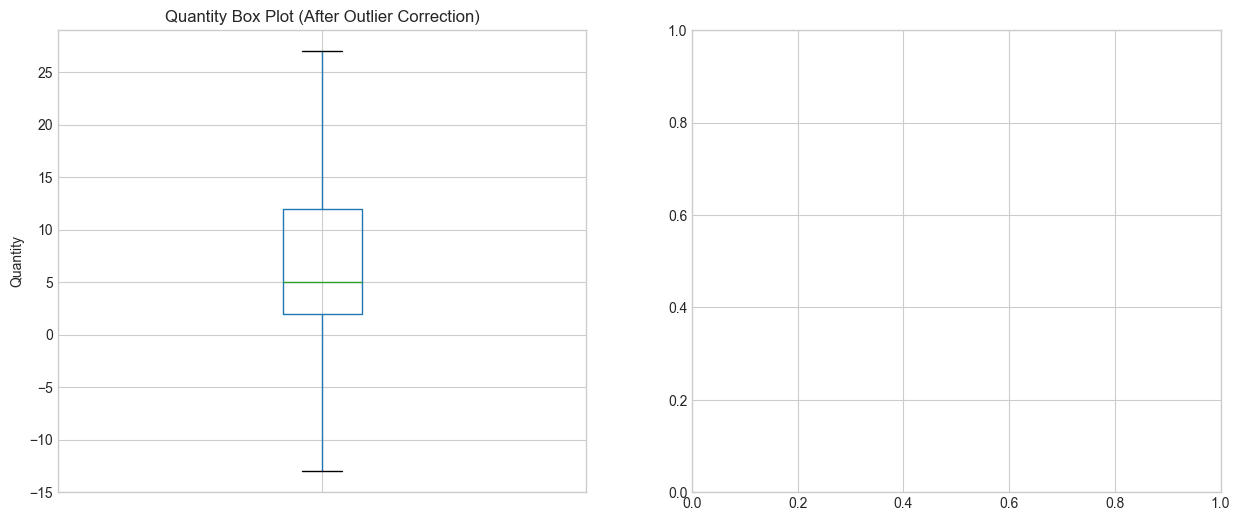

Original Quantity Statistics:
count    401604.000000
mean          8.114102
std           8.257794
min         -13.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64

Original UnitPrice Statistics:
count    401604.000000
mean          2.621666
std           2.118421
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max           7.500000
Name: UnitPrice, dtype: float64


Quantity Outlier Bounds: Lower = -13.0, Upper = 27.0
UnitPrice Outlier Bounds: Lower = -2.5, Upper = 7.5


<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data
data = pd.read_csv('cleaned_data.csv')

# Convert 'InvoiceDate' to datetime to ensure correct data types for all columns
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Define a function to calculate IQR and bounds
def get_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound, Q1, Q3, IQR

# --- Outlier Check and Visualization (Before Correction) ---

# Set up the plots
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for Quantity (Before)
data.boxplot(column='Quantity', ax=ax1)
ax1.set_title('Quantity Box Plot (Before Outlier Correction)')
ax1.set_ylabel('Quantity')
ax1.set_ylim(-20, 50)  # Set a reasonable limit to show the main data body
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Hide x-axis labels
plt.show()

# Boxplot for UnitPrice (Before)
data.boxplot(column='UnitPrice', ax=ax2)
ax2.set_title('UnitPrice Box Plot (Before Outlier Correction)')
ax2.set_ylabel('UnitPrice')
ax2.set_ylim(-2, 10)  # Set a reasonable limit to show the main data body
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Hide x-axis labels
plt.show()
plt.savefig('before_outlier_correction.png')



# --- Outlier Correction using IQR Method ---

# Correct outliers in 'Quantity'
q_lower, q_upper, q_Q1, q_Q3, q_IQR = get_iqr_bounds(data, 'Quantity')
# Cap outliers: values outside the bounds are set to the bounds
data['Quantity_cleaned'] = data['Quantity'].clip(lower=q_lower, upper=q_upper)

# Correct outliers in 'UnitPrice'
u_lower, u_upper, u_Q1, u_Q3, u_IQR = get_iqr_bounds(data, 'UnitPrice')
# Cap outliers: values outside the bounds are set to the bounds
data['UnitPrice_cleaned'] = data['UnitPrice'].clip(lower=u_lower, upper=u_upper)

# --- Visualization After Correction ---

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for Quantity (After)
data.boxplot(column='Quantity_cleaned', ax=ax3)
ax3.set_title('Quantity Box Plot (After Outlier Correction)')
ax3.set_ylabel('Quantity')
ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Hide x-axis labels
plt.show()
# Boxplot for UnitPrice (After)
data.boxplot(column='UnitPrice_cleaned', ax=ax4)
ax4.set_title('UnitPrice Box Plot (After Outlier Correction)')
ax4.set_ylabel('UnitPrice')
ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Hide x-axis labels
plt.show()
plt.savefig('after_outlier_correction.png')

# Drop the old columns and rename the new ones
data.drop(columns=['Quantity', 'UnitPrice'], inplace=True)
data.rename(columns={'Quantity_cleaned': 'Quantity', 'UnitPrice_cleaned': 'UnitPrice'}, inplace=True)

# Save the final cleaned data to a new CSV file
data.to_csv('final_cleaned_data.csv', index=False)

# Print some summary statistics to show the change
print("Original Quantity Statistics:")
print(data['Quantity'].describe())
print("\nOriginal UnitPrice Statistics:")
print(data['UnitPrice'].describe())

print("\n")
print(f"Quantity Outlier Bounds: Lower = {q_lower}, Upper = {q_upper}")
print(f"UnitPrice Outlier Bounds: Lower = {u_lower}, Upper = {u_upper}")